In [1]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

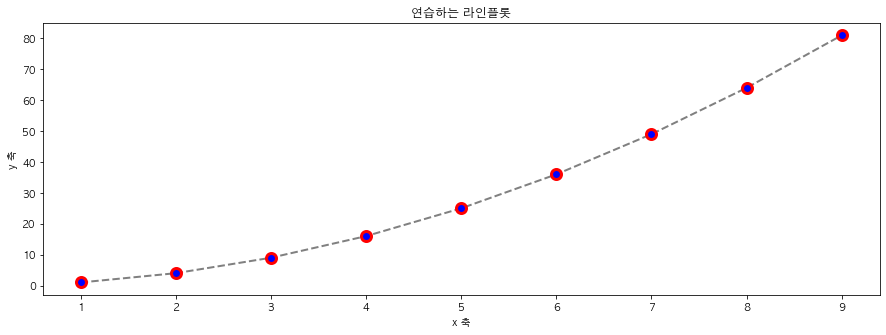

In [3]:
fig = plt.figure(figsize = (15,5))

x_data = [1,2,3,4,5,6,7,8,9]
y_data = [ X**2 for X in x_data]

plt.plot(x_data, y_data,
         c = 'grey',
         lw = '2',
         ls = '--',
         marker = 'o',
         ms = 10,
         mec = 'red',
         mew = 3,
         mfc = 'blue')


plt.xlabel('x 축')
plt.ylabel('y 축')
plt.title('연습하는 라인플롯')
plt.show()
plt.close()

In [4]:
pop_frm = pd.read_excel('/Users/choijaewoo/visualization_data/시도별 전출입 인구수.xlsx', header = 0)
pop_frm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,NaN,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,NaN,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139.0,202.0,141.0,210.0,219.0,415.0,392.0,408.0,...,668.0,579.0,672.0,561.0,551.0,516.0,609.0,683.0,733.0,768.0
321,NaN,전라남도,631.0,965.0,857.0,952.0,1133.0,2808.0,2608.0,2652.0,...,1143.0,1123.0,1002.0,1026.0,966.0,1001.0,928.0,1062.0,1127.0,1102.0
322,NaN,경상북도,374.0,619.0,468.0,576.0,625.0,1123.0,1141.0,1004.0,...,761.0,704.0,738.0,756.0,699.0,781.0,728.0,903.0,931.0,994.0
323,NaN,경상남도,474.0,479.0,440.0,571.0,1208.0,1517.0,863.0,1122.0,...,1517.0,1474.0,1324.0,1367.0,1227.0,1278.0,1223.0,1500.0,1448.0,1501.0


In [5]:
pop_frm = pop_frm.fillna(method='ffill')
pop_frm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,전국,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,전국,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139.0,202.0,141.0,210.0,219.0,415.0,392.0,408.0,...,668.0,579.0,672.0,561.0,551.0,516.0,609.0,683.0,733.0,768.0
321,제주특별자치도,전라남도,631.0,965.0,857.0,952.0,1133.0,2808.0,2608.0,2652.0,...,1143.0,1123.0,1002.0,1026.0,966.0,1001.0,928.0,1062.0,1127.0,1102.0
322,제주특별자치도,경상북도,374.0,619.0,468.0,576.0,625.0,1123.0,1141.0,1004.0,...,761.0,704.0,738.0,756.0,699.0,781.0,728.0,903.0,931.0,994.0
323,제주특별자치도,경상남도,474.0,479.0,440.0,571.0,1208.0,1517.0,863.0,1122.0,...,1517.0,1474.0,1324.0,1367.0,1227.0,1278.0,1223.0,1500.0,1448.0,1501.0


In [7]:
print('서울에서 다른 지역으로 이동한 데이터만 추출한다면')
pop_frm.columns

서울에서 다른 지역으로 이동한 데이터만 추출한다면


Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [9]:
mask = (pop_frm['전출지별']=='서울특별시') & (pop_frm['전입지별'] !='서울특별시')
seoul_subset = pop_frm[mask]
seoul_subset

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,서울특별시,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
28,서울특별시,경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0
29,서울특별시,강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0


In [10]:
print('전출지별 피처를 삭제한다면?-')
seoul_subset.drop(['전출지별'], axis=1, inplace= True)


전출지별 피처를 삭제한다면?-


In [11]:
seoul_subset.set_index('전입지별', inplace = True)